In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
k_path_file = "Bottleneck based on different factors - K-Path Matching.csv"
joint_file = "Bottleneck based on different factors - Joint Optimization.csv"

k_path_df = pd.read_csv(k_path_file)
joint_df = pd.read_csv(joint_file)

Text(0.02, 0.5, 'Model')

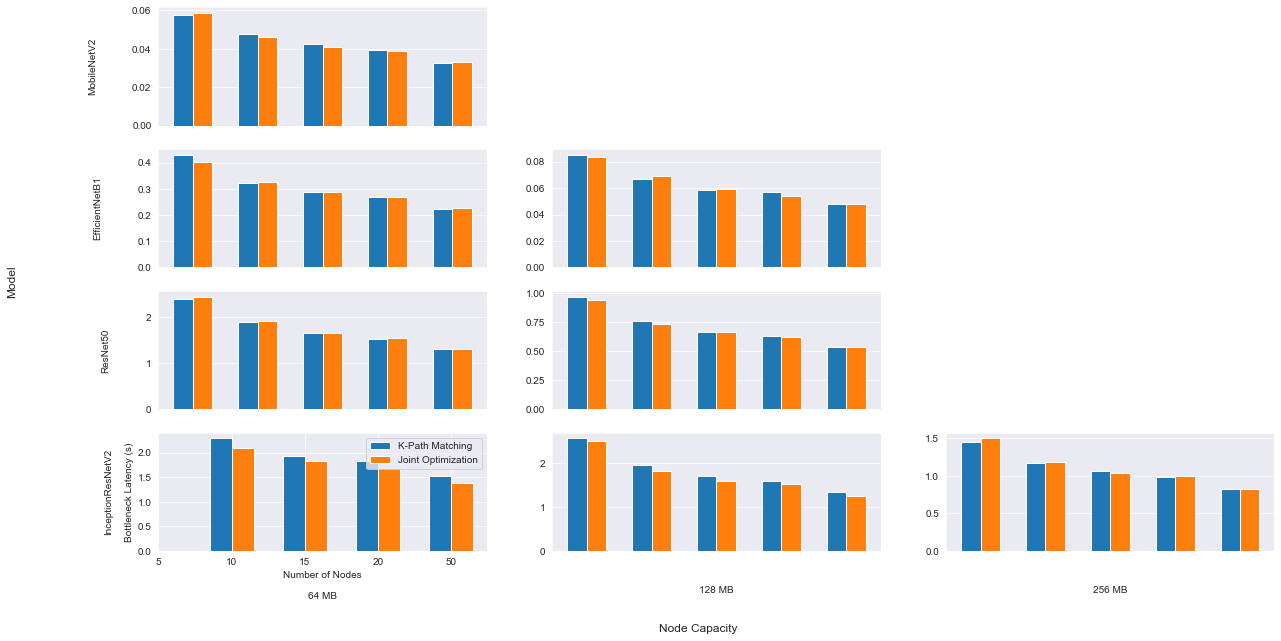

In [27]:
models = ['MobileNetV2', 'EfficientNetB1', 'ResNet50', 'InceptionResNetV2']
mems = [[64], [64, 128], [64, 128], [64, 128, 256]]
node_categories = np.unique(k_path_df['# of Nodes'])

N = len(node_categories)
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))
for i in range(len(mems)):
    sub_mems = mems[i]
    model = models[i]
    for sm in range(3):
        if sm > len(sub_mems) - 1:
            fig.delaxes(ax[i][sm])
            continue

        k_path_df_part = k_path_df.loc[(k_path_df['Model'] == model) & (k_path_df['Node Memory Capacity (MB)'] == sub_mems[sm]) & (k_path_df['# of Bandwidth Classes'] == 20), ['Bottleneck Latency (s)']]['Bottleneck Latency (s)']
        joint_df_part = joint_df.loc[(joint_df['Model'] == model) & (joint_df['Node Memory Capacity (MB)'] == sub_mems[sm]), ['Bottleneck Latency (s)']]['Bottleneck Latency (s)']

        k_path_bars = k_path_df_part.to_numpy()
        joint_bars = joint_df_part.to_numpy()

        subplot = ax[i][sm]
        subplot.bar(ind, k_path_bars, width, label='K-Path Matching')
        subplot.bar(ind + width, joint_bars, width, label='Joint Optimization')

        subplot.set_xticks([])

        xlabel = ''
        ylabel = ''
        if i == len(mems) - 1:
            if sm == 0:
                prefix = 'Number of Nodes'
            else:
                prefix = '\n'
            xlabel = f'{prefix}\n\n{sub_mems[sm]} MB'
        if sm == 0:
            if i == len(mems) - 1:
                suffix = 'Bottleneck Latency (s)'
                subplot.set_xticks(ind + width / 2, node_categories)
                subplot.legend(loc='upper right')
            else:
                suffix = '\n'
            ylabel = f'{models[i]}\n\n{suffix}'

        subplot.set_xlabel(xlabel)
        subplot.set_ylabel(ylabel)

fig.supxlabel('Node Capacity')
fig.supylabel('Model')
#plt.savefig('K-Path vs. Random Algorithm.png')

In [28]:
avg_df = k_path_df.loc[(k_path_df['# of Bandwidth Classes'] == 20) & (k_path_df['# of Nodes'] == 50) & pd.notna(k_path_df['Bottleneck Latency (s)']), ['Bottleneck Latency (s)']]['Bottleneck Latency (s)']
a = avg_df.to_numpy().mean()

In [29]:
avg_df2 = joint_df.loc[(joint_df['# of Nodes'] == 50) & pd.notna(joint_df['Bottleneck Latency (s)']), ['Bottleneck Latency (s)']]['Bottleneck Latency (s)']
b = avg_df2.to_numpy().mean()

In [32]:
print(a)
print(b)
print(((b-a) / a) * 100)

0.5289961771963636
0.7012980519750001
32.57147824617982
